In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [6]:
# Normalize images to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # YOur code here
        pass
        

    def forward(self, x): # x torhc.Tensor : shape (batch_size, 3, 32, 32)
        # YOur code here
        pass
        

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




# Training loop
'''
Your code here to train model

'''

Epoch 1, Loss: 1.4744
Epoch 2, Loss: 1.1513
Epoch 3, Loss: 1.0107
Epoch 4, Loss: 0.9205
Epoch 5, Loss: 0.8509


In [12]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 67.12%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth: cat ship ship plane frog frog car frog
Predicted:   cat ship plane plane deer frog car deer


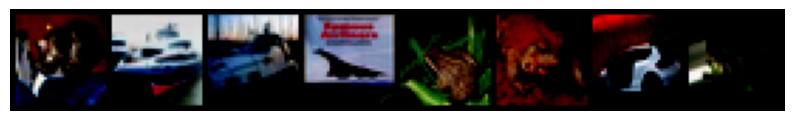

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to unnormalize and show images
def imshow(img):
    # img = img / 2 + 0.5  # unnormalize (since we normalized to [-1, 1])
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Move images to same device as model
images = images.to(device)
labels = labels.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Print ground truth and predicted classes
print('GroundTruth:', ' '.join(f'{classes[labels[j]]}' for j in range(8)))
print('Predicted:  ', ' '.join(f'{classes[predicted[j]]}' for j in range(8)))

# Show images
imshow(torchvision.utils.make_grid(images.cpu()[:8]))